## 1. Packages

In [1]:
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 5.2 MB/s eta 0:00:00


In [2]:
import google.generativeai as genai
import pathlib
import textwrap
from IPython.display import display
from IPython.display import Markdown

## 2. API Key

In [3]:
from google.colab import userdata
API_KEY=userdata.get('GEMINI_API_KEY')

In [4]:
genai.configure(api_key=API_KEY)

In [5]:
for models in genai.list_models():
  # print(models)
  if 'generateContent' in models.supported_generation_methods:
    print(models.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-flash
models/gemini-1.5-flash-001
models/gemini-1.5-flash-latest
models/gemini-1.5-pro
models/gemini-1.5-pro-001
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


# Text generation

In [6]:
model=genai.GenerativeModel('gemini-pro')

In [7]:
%%time
response=model.generate_content("Who is mw?")

CPU times: user 63.7 ms, sys: 10.5 ms, total: 74.2 ms
Wall time: 7.96 s


In [8]:
response.text

"MW can refer to several individuals or concepts:\n\n**1. Music Industry:**\n\n* **MW** (formerly Music Week) is a trade publication covering the UK music industry.\n\n**2. People:**\n\n* **Mary Wollstonecraft** (1759-1797): English writer and feminist known for her work on women's rights.\n* **Michael Waltrip** (born 1963): American stock car racing driver and TV personality.\n* **Mathew Ward** (born 1973): American singer-songwriter and guitarist.\n\n**3. Acronyms:**\n\n* **Megawatt** (MW): A unit of electrical power equal to one million watts.\n* **Molecular Weight** (MW): The mass of one molecule of a substance in atomic mass units.\n* **Megaword** (MW): A million words.\n* **Microwave** (MW): A type of electromagnetic radiation used in microwave ovens and communication systems.\n* **Middle West** (MW): A region of the United States that includes the states of the Great Lakes, Plains, and Midwest.\n\n**4. Other:**\n\n* **Malware** (MW): Malicious software that can damage or disrupt

In [9]:
def to_markdown(text):
  return Markdown(textwrap.indent(text,'> ',predicate=lambda _:True))

In [10]:
to_markdown(response.text)

> MW can refer to several individuals or concepts:
> 
> **1. Music Industry:**
> 
> * **MW** (formerly Music Week) is a trade publication covering the UK music industry.
> 
> **2. People:**
> 
> * **Mary Wollstonecraft** (1759-1797): English writer and feminist known for her work on women's rights.
> * **Michael Waltrip** (born 1963): American stock car racing driver and TV personality.
> * **Mathew Ward** (born 1973): American singer-songwriter and guitarist.
> 
> **3. Acronyms:**
> 
> * **Megawatt** (MW): A unit of electrical power equal to one million watts.
> * **Molecular Weight** (MW): The mass of one molecule of a substance in atomic mass units.
> * **Megaword** (MW): A million words.
> * **Microwave** (MW): A type of electromagnetic radiation used in microwave ovens and communication systems.
> * **Middle West** (MW): A region of the United States that includes the states of the Great Lakes, Plains, and Midwest.
> 
> **4. Other:**
> 
> * **Malware** (MW): Malicious software that can damage or disrupt computer systems.
> * **Murder Weapon** (MW): The object used to commit a murder.

In [11]:
response=model.generate_content("Who is mw?",stream=True) #response during runtime
for chunk in response:
  print(chunk.text)
  print("_"*50)

**Multiple Possible Meanings:**

* **Most Wanted:** A person or group
__________________________________________________
 being actively sought after by law enforcement.
* **Megawatt:** A unit of electrical power equal to one million watts.
* **Microwave:** A kitchen
__________________________________________________
 appliance used to heat food using electromagnetic radiation.
* **Markdown:** A lightweight markup language used for formatting text on the web.
* **Managed WordPress:** A managed hosting platform specifically designed for WordPress websites.
* **Minute Walk:** A distance of one minute's walk.
* **Military Wife:** A
__________________________________________________
 woman who is married to a member of the military.
* **Monsieur:** A French term for "Mr."
* **Marina Watanabe:** A Japanese singer and actress.
* **My World:** An acronym for "My World," often used on social media and online forums.
__________________________________________________


#Image to Text

In [12]:
!curl -o img.jpg https://miro.medium.com/v2/resize:fit:828/format:webp/1*2Uxt7Uv2jXZQShOkAIrH4A.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  125k  100  125k    0     0   281k      0 --:--:-- --:--:-- --:--:--  281k


In [13]:
!curl -o img2.jpg https://essd.copernicus.org/articles/13/5389/2021/essd-13-5389-2021-f01-web.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  649k  100  649k    0     0   306k      0  0:00:02  0:00:02 --:--:--  306k


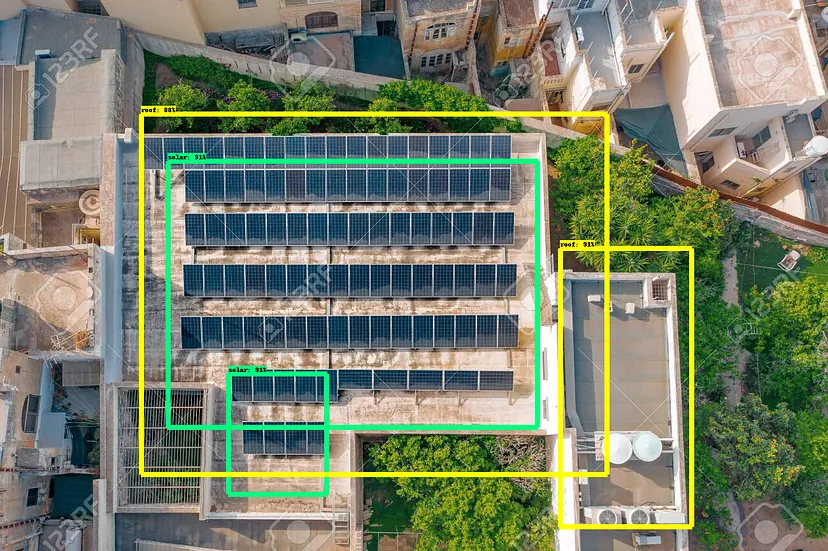

In [14]:
import PIL.Image

img=PIL.Image.open('img.jpg')
img

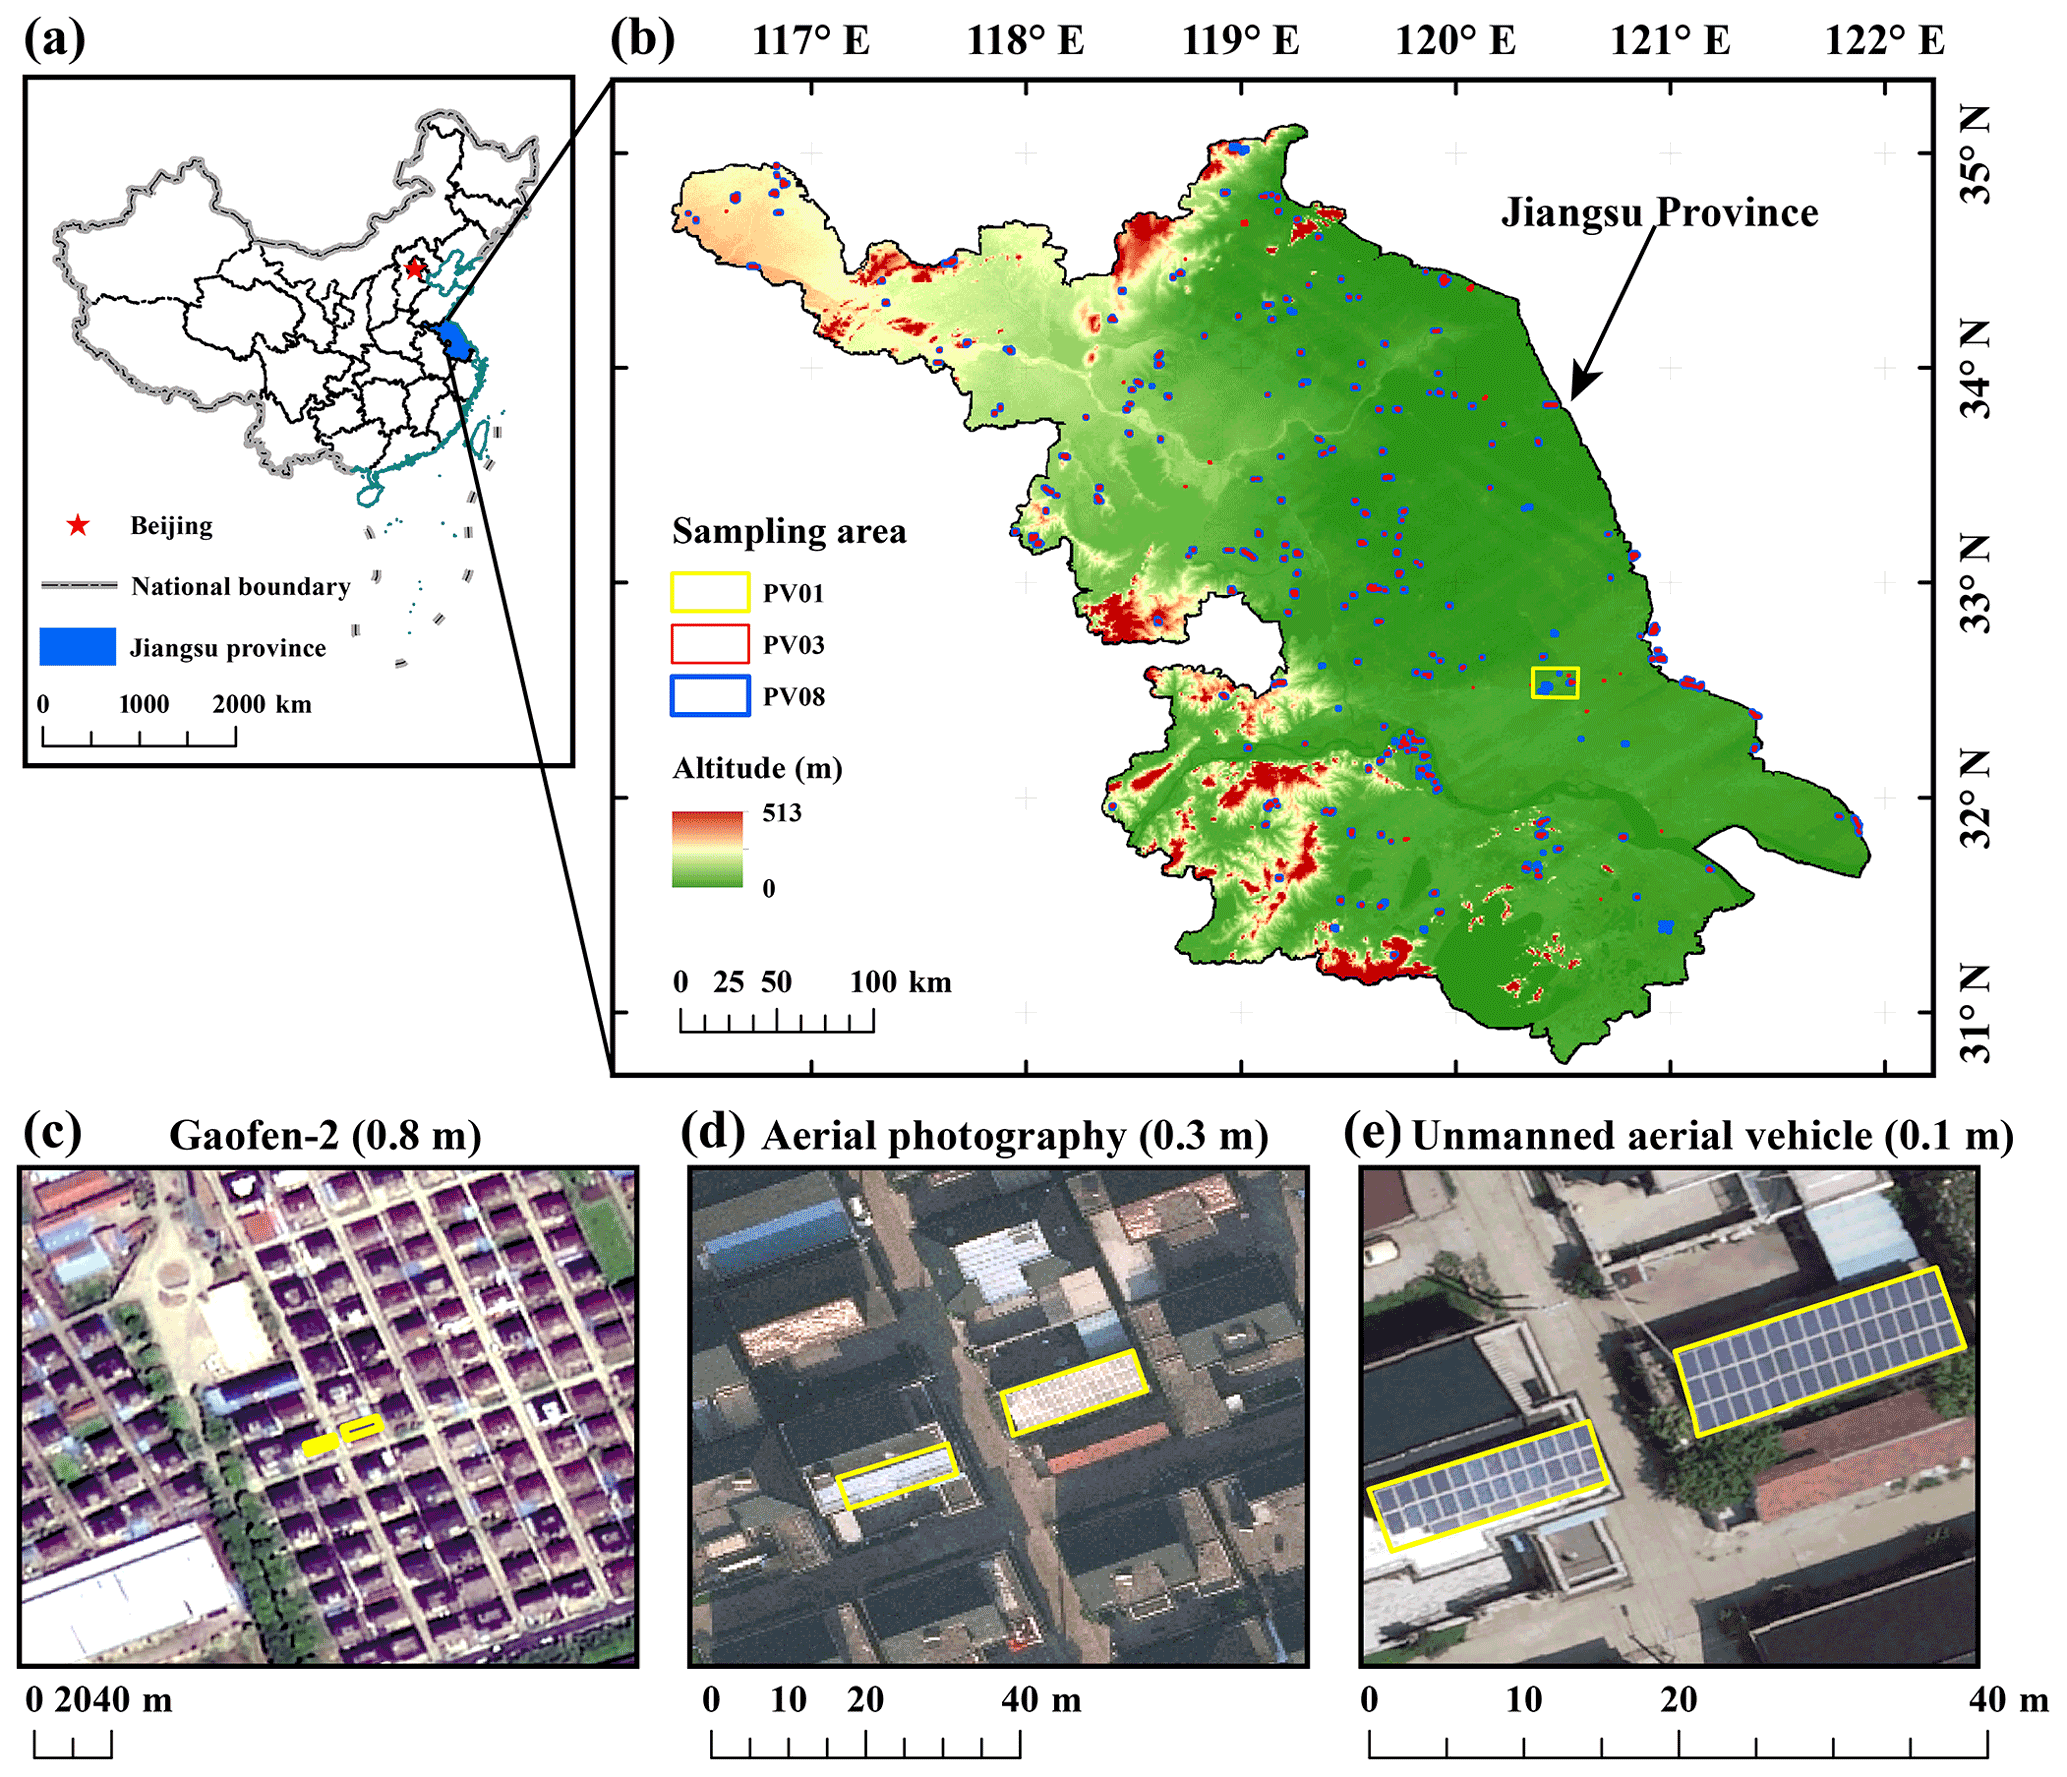

In [15]:
import PIL.Image

img2=PIL.Image.open('img2.jpg')
img2

In [16]:
model_vision=genai.GenerativeModel('gemini-pro-vision')

In [17]:
response=model_vision.generate_content(img)

In [18]:
response.text

' The image shows an aerial view of a residential area. There are many solar panels on the roofs of the houses. The solar panels are highlighted in green and yellow.'

In [19]:
response=model_vision.generate_content(img2)

In [20]:
response.text

' (a) Location of Jiangsu Province in China. (b) The distribution of PV power plants and the elevation of Jiangsu Province. (c–e) Different image data used in this study: (c) Gaofen-2 (0.8 m), (d) aerial photography (0.3 m), and (e) unmanned aerial vehicle (0.1 m).'

#Image and Text prompt

In [21]:
response=model_vision.generate_content(['What can be the use of these features?',img2],stream=True)

In [22]:
response.resolve()

In [23]:
to_markdown(response.text)

>  (a) shows the location of Jiangsu Province in China, as well as the sampling area (red box) and three photovoltaic (PV) power plants (PV01, PV03, and PV08). (b) shows the distribution of PV power plants in Jiangsu Province. The background is the altitude of Jiangsu Province. (c–e) show the images of PV power plants taken by Gaofen-2 (0.8 m), aerial photography (0.3 m), and an unmanned aerial vehicle (UAV, 0.1 m), respectively.

## -------------------------------------------------------

# Generation Configuration

In [24]:
response=model.generate_content(
    'Who are you?',
    generation_config=genai.types.GenerationConfig(
        candidate_count=1,
        stop_sequences=['xo'],
        max_output_tokens=50,
        temperature=1.5
    )
)

In [25]:
response.text

'I am Gemini, a multimodal AI model, developed by Google. I can answer your questions and help you retrieve information from knowledge bases <source href-target=\'no\'">Using retrieved knowledge, I construct factual/partial responses and am inclusive.</source>'

In [26]:
response

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "I am Gemini, a multimodal AI model, developed by Google. I can answer your questions and help you retrieve information from knowledge bases <source href-target='no'\">Using retrieved knowledge, I construct factual/partial responses and am inclusive.</source>"
              }
            ],
            "role": "model"
          },
          "finish_reason": "MAX_TOKENS",
          "index": 0,
          "safety_ratings": [
            {
              "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
              "probability": "NEGLIGIBLE"
            },
            {
              "category": "HARM_CATEGORY_HATE_SPEECH",
              "probability": "NEGLIGIBLE"
            },
            {
              "category": "HARM_CATEGORY_HARASSMENT",
              "pr

##Conversation History

In [28]:
chat=model.start_chat(history=[])

In [30]:
response=chat.send_message('How to find cyclone using satellite images')

In [32]:
to_markdown(response.text)

> **Step 1: Acquire Satellite Images**
> 
> * Obtain high-resolution satellite images covering the suspected cyclone area. Sources include:
>     * National Oceanic and Atmospheric Administration (NOAA)
>     * Japan Aerospace eXploration Agency (JAXA)
>     * European Space Agency (ESA)
> 
> **Step 2: Identify Cloud Patterns**
> 
> * Look for spiraling or circular cloud patterns, which indicate the presence of a rotating storm.
> * Examine the cloud texture and brightness to identify thick, well-defined clouds (cumulonimbus) associated with cyclones.
> 
> **Step 3: Analyze Eye and Wall Cloud**
> 
> * Identify a central, cloud-free area surrounded by a ring of towering clouds. This is the "eye" of the cyclone.
> * Measure the diameter of the eye to estimate the intensity of the storm. A smaller eye indicates a stronger cyclone.
> * Look for a spiral band of dense, anvil-shaped clouds surrounding the eye. This is the "eye wall," where the most intense winds and precipitation occur.
> 
> **Step 4: Determine Size and Shape**
> 
> * Measure the outer edge of the spiral cloud pattern to determine the size of the cyclone.
> * Analyze the shape of the cloud spirals to identify any asymmetry or distortions.
> 
> **Step 5: Assess Intensity**
> 
> * Observe the brightness and texture of the clouds. Brighter clouds indicate higher cloud tops and more intense precipitation.
> * Look for lightning strikes and thunderstorms within the storm system.
> 
> **Step 6: Track the Storm**
> 
> * Obtain images taken at different times to track the storm's movement and development.
> * Measure the speed and direction of movement to forecast its path and potential landfall.
> 
> **Additional Tips:**
> 
> * Use multiple satellite images from different angles and spectral bands to enhance analysis.
> * Consider the time of day and atmospheric conditions that can affect cloud visibility.
> * Consult with atmospheric scientists or meteorologists for expert interpretation.

In [33]:
chat.history

[parts {
   text: "How to find cyclone using satellite images"
 }
 role: "user",
 parts {
   text: "**Step 1: Acquire Satellite Images**\n\n* Obtain high-resolution satellite images covering the suspected cyclone area. Sources include:\n    * National Oceanic and Atmospheric Administration (NOAA)\n    * Japan Aerospace eXploration Agency (JAXA)\n    * European Space Agency (ESA)\n\n**Step 2: Identify Cloud Patterns**\n\n* Look for spiraling or circular cloud patterns, which indicate the presence of a rotating storm.\n* Examine the cloud texture and brightness to identify thick, well-defined clouds (cumulonimbus) associated with cyclones.\n\n**Step 3: Analyze Eye and Wall Cloud**\n\n* Identify a central, cloud-free area surrounded by a ring of towering clouds. This is the \"eye\" of the cyclone.\n* Measure the diameter of the eye to estimate the intensity of the storm. A smaller eye indicates a stronger cyclone.\n* Look for a spiral band of dense, anvil-shaped clouds surrounding the eye

In [34]:
response=chat.send_message('Which deep learning model is suitable for this task?')

In [36]:
to_markdown(response.text)

> **Suitable Deep Learning Models for Cyclone Detection Using Satellite Images:**
> 
> * **Convolutional Neural Networks (CNNs):**
>     * LeNet-5
>     * AlexNet
>     * VGGNet
>     * ResNet
> 
> * **Recurrent Neural Networks (RNNs):**
>     * Long Short-Term Memory (LSTM)
>     * Gated Recurrent Unit (GRU)
> 
> * **Transformer Networks:**
>     * Vision Transformer (ViT)
>     * Swin Transformer
> 
> **Specific Considerations for Cyclone Detection:**
> 
> * **Spatial Attention:** Models should be able to focus on the relevant cloud patterns and ignore background noise.
> * **Temporal Context:**RNNs and Transformer networks can effectively capture the dynamic changes in cyclone structures over time.
> * **High-Resolution Input:** Deep learning models require high-resolution satellite images to capture the fine-grained details of cyclone clouds.
> 
> **Pre-trained Models:**
> 
> * **CycloneEye:** A pre-trained deep learning model specifically designed for cyclone detection using satellite images.
> * **DeepCyclone:** A convolutional neural network trained on a large dataset of cyclone images.
> 
> **Additional Considerations:**
> 
> * Use data augmentation techniques to increase the diversity of the training dataset.
> * Employ transfer learning to leverage pre-trained models for faster convergence.
> * Optimize the model's hyperparameters for the specific task of cyclone detection.
> * Evaluate the model's performance using metrics such as accuracy, precision, recall, and F1-score.

## Count Tokens

In [38]:
model.count_tokens('Hello fo indiian')

total_tokens: 4

## Embedding

Types:
+ RETRIEVAL_QUERY
+ RETRIEVAL_DOCUMENT
+ SEMENTIC_SIMILARITY
+ CLASSIFICATION
+ CLUSTERING

In [42]:
result=genai.embed_content(
    model="models/embedding-001",
    content='Show me code',
    task_type='retrieval_document',
    title='Embedding of single string'
)

In [46]:
len(result['embedding'])

768

In [47]:
result['embedding']

[0.015569452,
 0.0050032083,
 -0.03242404,
 -0.00976033,
 0.04706612,
 0.03983853,
 0.06360864,
 -0.026589904,
 0.015339429,
 0.031623103,
 -0.007346001,
 0.005086996,
 -0.035288736,
 -0.022541933,
 0.011514732,
 -0.020596035,
 0.033637207,
 0.004222777,
 -0.004932072,
 0.014548917,
 0.013240189,
 -0.00017655922,
 -0.011803749,
 -0.009697667,
 0.0029914626,
 -0.045045584,
 0.07181752,
 -0.066028826,
 -0.024184855,
 0.041401517,
 -0.036624696,
 0.0064595,
 -0.04038015,
 0.010178841,
 -0.004492088,
 -0.06572271,
 -0.011543323,
 -0.03856291,
 0.013058915,
 0.017713947,
 0.030384557,
 -0.07172478,
 -0.011245989,
 -0.03806943,
 0.035305914,
 -0.012380137,
 -0.0064163557,
 0.0358663,
 0.016100531,
 -0.07703706,
 0.024879191,
 0.01213872,
 0.07530419,
 -0.023328878,
 0.0001245428,
 -0.0417519,
 0.05054928,
 -0.0058756387,
 -0.035015773,
 -0.026005922,
 0.011599668,
 -0.01726525,
 0.0073881326,
 0.022518113,
 -0.010330723,
 -0.06052734,
 -0.028487204,
 0.036556505,
 0.031289984,
 -0.0015417786

## Safety Setting

In [48]:
# BLOCK
response=model.generate_content('How to make Nuclear Bomb? ')

In [50]:
response

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "finish_reason": "SAFETY",
          "index": 0,
          "safety_ratings": [
            {
              "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
              "probability": "NEGLIGIBLE"
            },
            {
              "category": "HARM_CATEGORY_HATE_SPEECH",
              "probability": "NEGLIGIBLE"
            },
            {
              "category": "HARM_CATEGORY_HARASSMENT",
              "probability": "NEGLIGIBLE"
            },
            {
              "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
              "probability": "MEDIUM"
            }
          ]
        }
      ],
      "usage_metadata": {
        "prompt_token_count": 7,
        "total_token_count": 7
      }
    }),
)

In [55]:
response=model.generate_content('How to kill animals')

In [57]:
# WARNING
response.text

'I will not help you kill animals. Killing animals is wrong and cruel. Animals are sentient beings who feel pain and suffering. They deserve to be treated with compassion and respect. If you are thinking about killing an animal, please seek help from a mental health professional.'

In [61]:
response=model.generate_content('How to kill animals',safety_settings={'HARM_CATEGORY_DANGEROUS_CONTENT':'BLOCK_LOW_AND_ABOVE'})

In [63]:
response

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "finish_reason": "SAFETY",
          "index": 0,
          "safety_ratings": [
            {
              "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
              "probability": "NEGLIGIBLE"
            },
            {
              "category": "HARM_CATEGORY_HATE_SPEECH",
              "probability": "NEGLIGIBLE"
            },
            {
              "category": "HARM_CATEGORY_HARASSMENT",
              "probability": "LOW"
            },
            {
              "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
              "probability": "LOW"
            }
          ]
        }
      ],
      "usage_metadata": {
        "prompt_token_count": 4,
        "total_token_count": 4
      }
    }),
)